###### import pandas as pd
import numpy as np

# Libaries to help with data visualiznatio
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Importing the models we require
from sklearn.linear_model import LinearRegression

from scipy import stats

# To get diferent metric scores
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,plot_confusion_matrix,precision_recall_curve,roc_curve,make_scorer

# Code to ignore warnings from function usage
import warnings;

In [178]:
wind = pd.read_csv("results_wind_november.csv")
data1 = wind.copy()
pre = pd.read_csv("res.csv")
data2 = pre.copy()
population = pd.read_csv("census_population.csv")
data = population.copy()

solar = pd.read_csv("solar.csv")
data_s = solar.copy()

In [179]:
data1.head()


,locations,lat,lon,latv,lonv,FLDAS_NOAH01_C_GL_M_001_Wind_f_tavg,lat_bnds,lon_bnds
0,0,39.05,-79.85,0,0,5.017930,39.0,-79.9
1,1,39.05,-79.85,0,1,5.017930,39.0,-79.8
2,2,39.05,-79.85,1,0,5.017930,39.1,-79.9
3,3,39.05,-79.85,1,1,5.017930,39.1,-79.8
4,4,39.05,-79.75,0,0,5.020971,39.0,-79.8


In [180]:
data2.head()

,locations,lat,lon,latv,lonv,GPM_3IMERGM_06_precipitation,lat_bnds,lon_bnds
0,0,39.049999,-79.849998,0,0,110.545074,39.0,-79.9
1,1,39.049999,-79.849998,0,1,110.545074,39.0,-79.8
2,2,39.049999,-79.849998,1,0,110.545074,39.1,-79.9
3,3,39.049999,-79.849998,1,1,110.545074,39.1,-79.8
4,4,39.049999,-79.750000,0,0,109.196150,39.0,-79.8


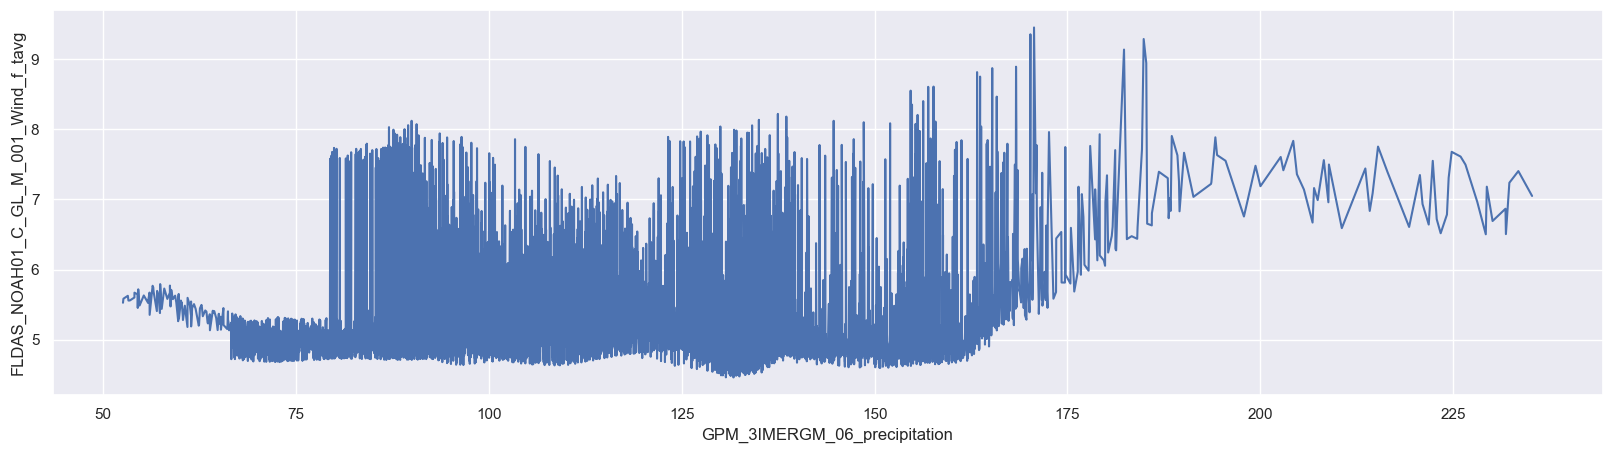

In [181]:
plt.figure(figsize=(20, 5))
sns.lineplot(y=data1["FLDAS_NOAH01_C_GL_M_001_Wind_f_tavg"], x=data2["GPM_3IMERGM_06_precipitation"], ci=None)
plt.show()

In [182]:
def recommendations_wind(data, n, min_wind):
    
    #Finding with minimum number of windfavg
    recommendations1 = data[data['FLDAS_NOAH01_C_GL_M_001_Wind_f_tavg'] >= min_wind]
    
    #Sorting values w.r.t average rating 
    recommendations1 = recommendations1.sort_values(by='FLDAS_NOAH01_C_GL_M_001_Wind_f_tavg', ascending=False)
    
    return recommendations1.index[:n]

def recommendations_prec(data, n, min_prec):
    recommendations2 = data[data['GPM_3IMERGM_06_precipitation'] <= min_prec]
    
    recommendations2 = recommendations2.sort_values(by='GPM_3IMERGM_06_precipitation', ascending=False)
    
    return recommendations2.index[:n]

In [183]:
list(recommendations_wind(data1, 20, 7))

[11832,
 11833,
 11834,
 11835,
 11828,
 11829,
 11830,
 11831,
 14439,
 14438,
 14437,
 14436,
 14433,
 14432,
 14434,
 14435,
 15475,
 15472,
 15473,
 15474]

In [184]:
l2 = list(recommendations_prec(data2, 1000, 100))

In [185]:
data_s.head()

,Unnamed: 0,lat,lon,latv,lonv,FLDAS_NOAH01_C_GL_M_001_Swnet_tavg,lat_bnds,lon_bnds
0,0,39.05,-79.85,0,0,59.435623,39.0,-79.9
1,1,39.05,-79.85,0,1,59.435623,39.0,-79.8
2,2,39.05,-79.85,1,0,59.435623,39.1,-79.9
3,3,39.05,-79.85,1,1,59.435623,39.1,-79.8
4,4,39.05,-79.75,0,0,59.686844,39.0,-79.8


In [186]:
def recommendations_solar(data, n, min_solar):
    recommendations2 = data[data['FLDAS_NOAH01_C_GL_M_001_Swnet_tavg'] <= min_solar]
    
    recommendations2 = recommendations2.sort_values(by='FLDAS_NOAH01_C_GL_M_001_Swnet_tavg', ascending=False)
    
    return recommendations2.index[:n]

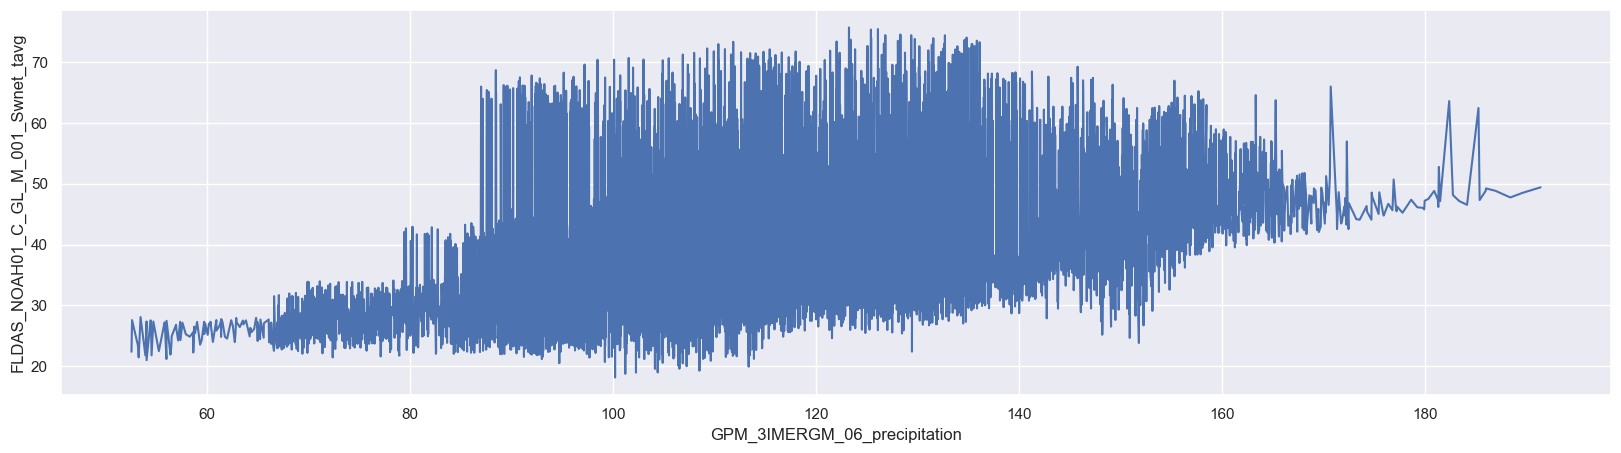

In [187]:
plt.figure(figsize=(20, 5))
sns.lineplot(y=data_s["FLDAS_NOAH01_C_GL_M_001_Swnet_tavg"], x=data2["GPM_3IMERGM_06_precipitation"], ci=None)
plt.show()

In [188]:
l3 = list(recommendations_solar(data_s, 1000, 70))

In [189]:
suitbale_locations = []
for i in l3:
    if i in l2:
        suitbale_locations.append(i)
print(suitbale_locations)

[618, 616, 617, 619, 1136, 1137, 1138, 1139, 1133, 1135, 1134, 1132]


C:\Users\16513\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\16513\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


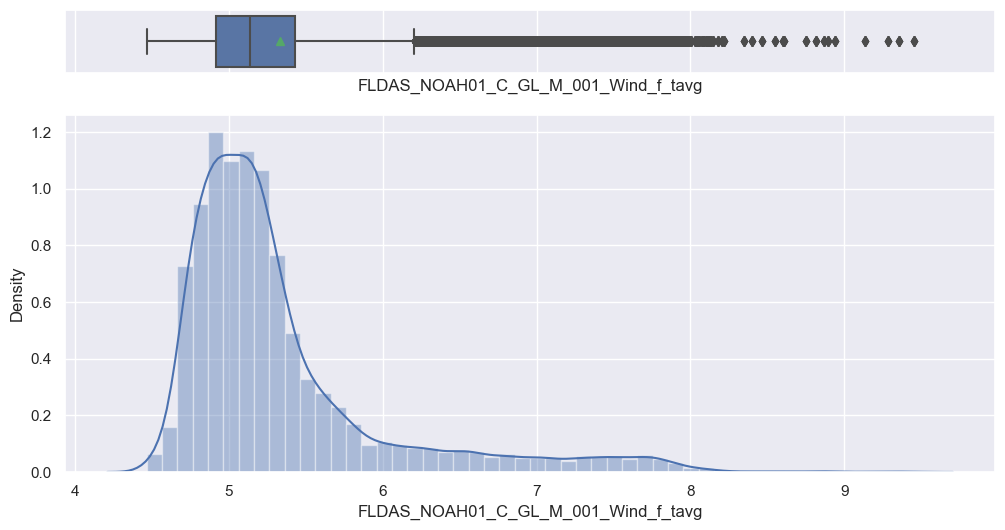

In [190]:
def hist_box(data,col):
  f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (0.15, 0.85)}, figsize=(12,6))
  # Adding a graph in each part
  sns.boxplot(data[col], ax=ax_box, showmeans=True)
  sns.distplot(data[col], ax=ax_hist)
  plt.show()

hist_box(data1, "FLDAS_NOAH01_C_GL_M_001_Wind_f_tavg")

C:\Users\16513\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\16513\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


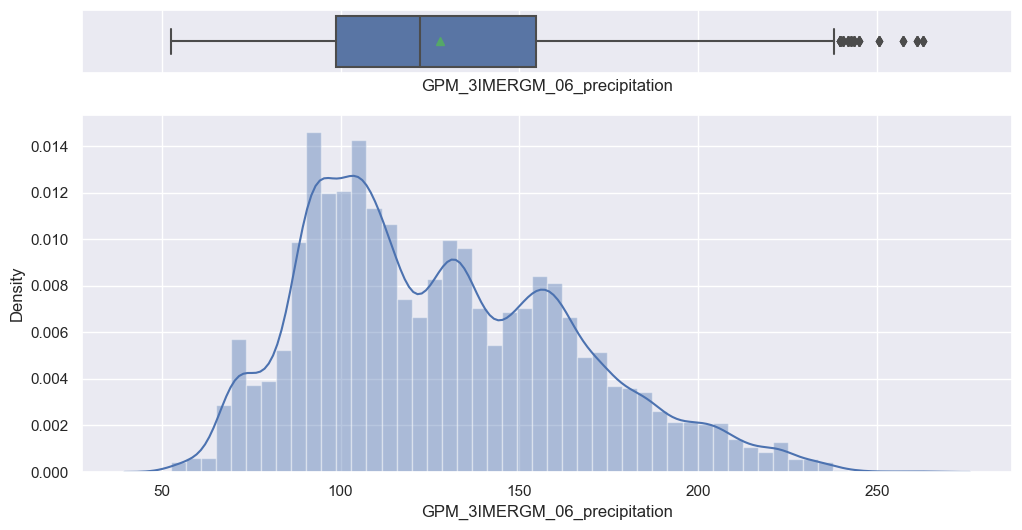

In [191]:
hist_box(data2, "GPM_3IMERGM_06_precipitation")

C:\Users\16513\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\16513\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


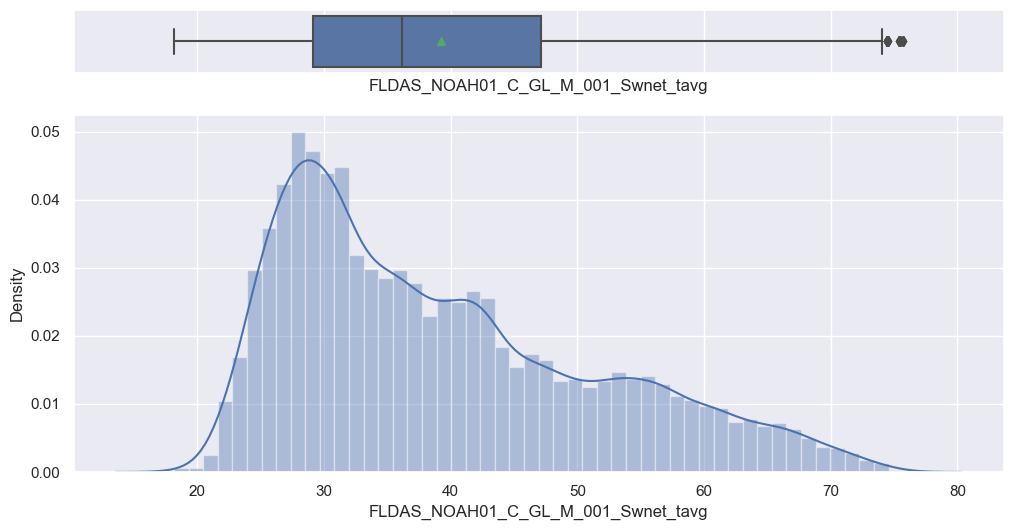

In [192]:
hist_box(data_s, "FLDAS_NOAH01_C_GL_M_001_Swnet_tavg")

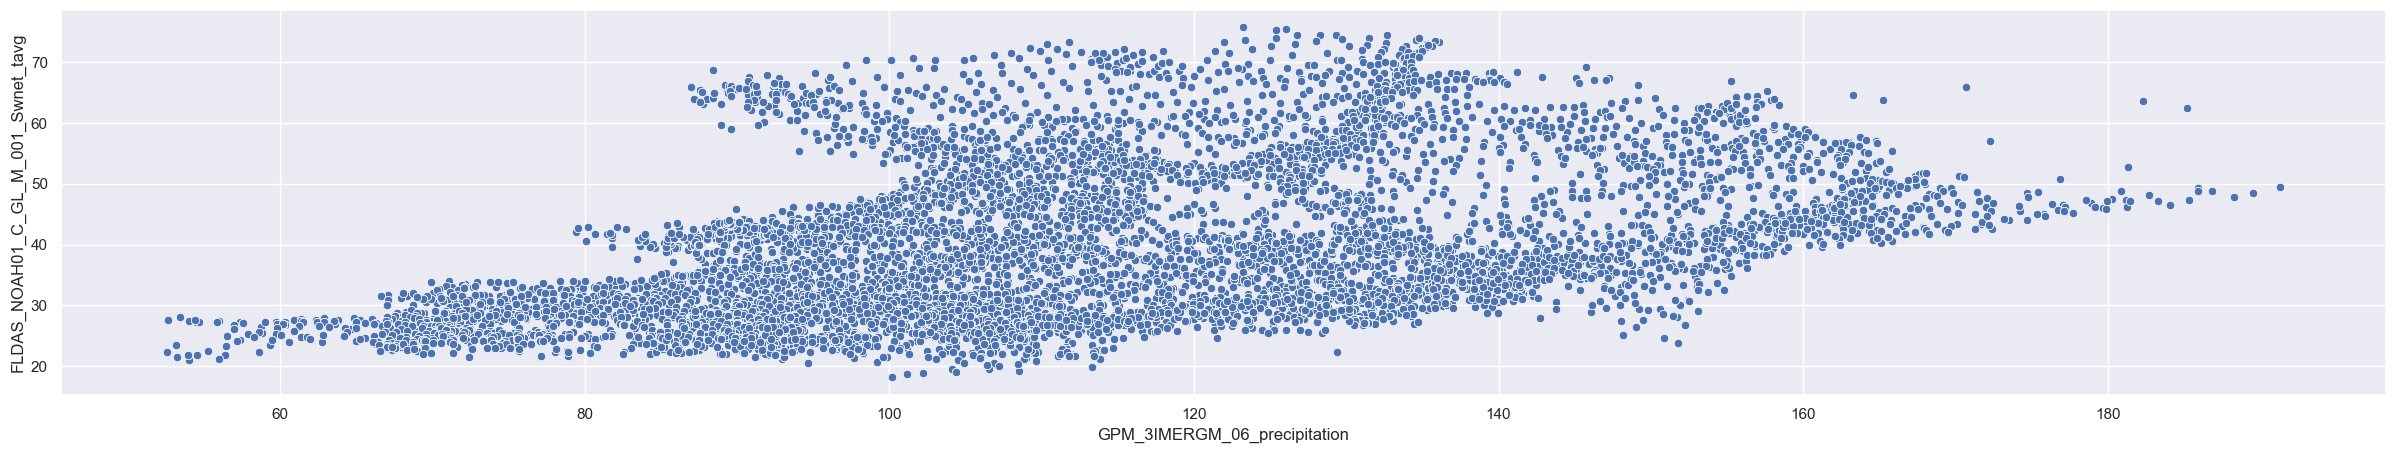

In [193]:
plt.figure(figsize=(30, 5))
sns.scatterplot(y=data_s["FLDAS_NOAH01_C_GL_M_001_Swnet_tavg"], x=data2["GPM_3IMERGM_06_precipitation"])
plt.show()
